In [183]:
import networkx as nx
from networkx.algorithms.bipartite import sets
from numpy import *
from networkx.algorithms import bipartite
import itertools
import random
#import import_ipynb
#import accessory
import matplotlib.pyplot as plt
from datetime import datetime
import time

In [184]:
# Граф Эрдьёша-Реньи

def random_graph(n:int, p:double, rnd=None) -> nx.Graph:
  gr = nx.Graph()
  N_range = range(n)
  gr.add_nodes_from(N_range)
   
  for pair in itertools.permutations(N_range, 2):
    if random.random()  < p:
      gr.add_edge(*pair)
   
  return gr

In [185]:
#Генерация сочетаний из n по k без повторений

def comb(n, k):   
    a = list(range(0, k))
    yield a

    while True:
        i = k - 1
        while i >= 0 and a[i] > n - k + i - 1:
            i -= 1
        if i < 0:
            return

        a[i] += 1
        for j in range(i + 1, k):
            a[j] = a[j - 1] + 1

        yield a

In [186]:
#Рандомная генерация сочетаний из n по k без повторений

def comb_rand(n, k):   
    a = list(range(0, n))
    yield a
    
    for j in range(0, k):
        i = random.randint(j, n-1)
        a[i], a[j] = a[j], a[i]
        yield a

In [187]:
def is_bipartite_node_set(G, nodes):
    S = set(nodes)
    for CC in (G.subgraph(c).copy() for c in nx.connected_components(G)):
        X, Y = sets(CC)
        if not ((X.issubset(S) and Y.isdisjoint(S)) or
                (Y.issubset(S) and X.isdisjoint(S))):
            return False
    return True

In [188]:
def color(G):
    if G.is_directed():
        import itertools

        def neighbors(v):
            return itertools.chain.from_iterable([G.predecessors(v),
                                                  G.successors(v)])
    else:
        neighbors = G.neighbors

    color = {}
    for n in G:  # handle disconnected graphs
        if n in color or len(G[n]) == 0:  # skip isolates
            continue
        queue = [n]
        color[n] = 1  # nodes seen with color (1 or 0)
        while queue:
            v = queue.pop()
            c = 1 - color[v]  # opposite color of node v
            for w in neighbors(v):
                if w in color:
                    if color[w] == color[v]:
                        raise nx.NetworkXError("Graph is not bipartite.")
                else:
                    color[w] = c
                    queue.append(w)
    # color isolates with 0
    color.update(dict.fromkeys(nx.isolates(G), 0))
    return color

In [189]:
def is_bipartite(G):
    try:
        color(G)
        return True
    except nx.NetworkXError:
        return False


In [190]:
def min_weighted_vertex_cover(G, weight=None):
    cost = dict(G.nodes(data=weight, default=1))
    # While there are uncovered edges, choose an uncovered and update
    # the cost of the remaining edges.
    for u, v in G.edges():
        min_cost = min(cost[u], cost[v])
        cost[u] -= min_cost
        cost[v] -= min_cost
    return {u for u, c in cost.items() if c == 0}

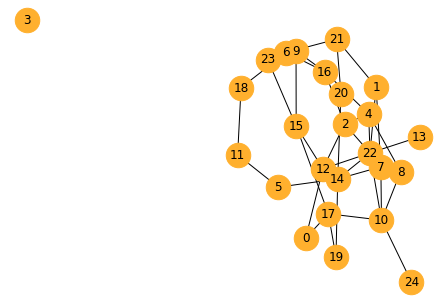

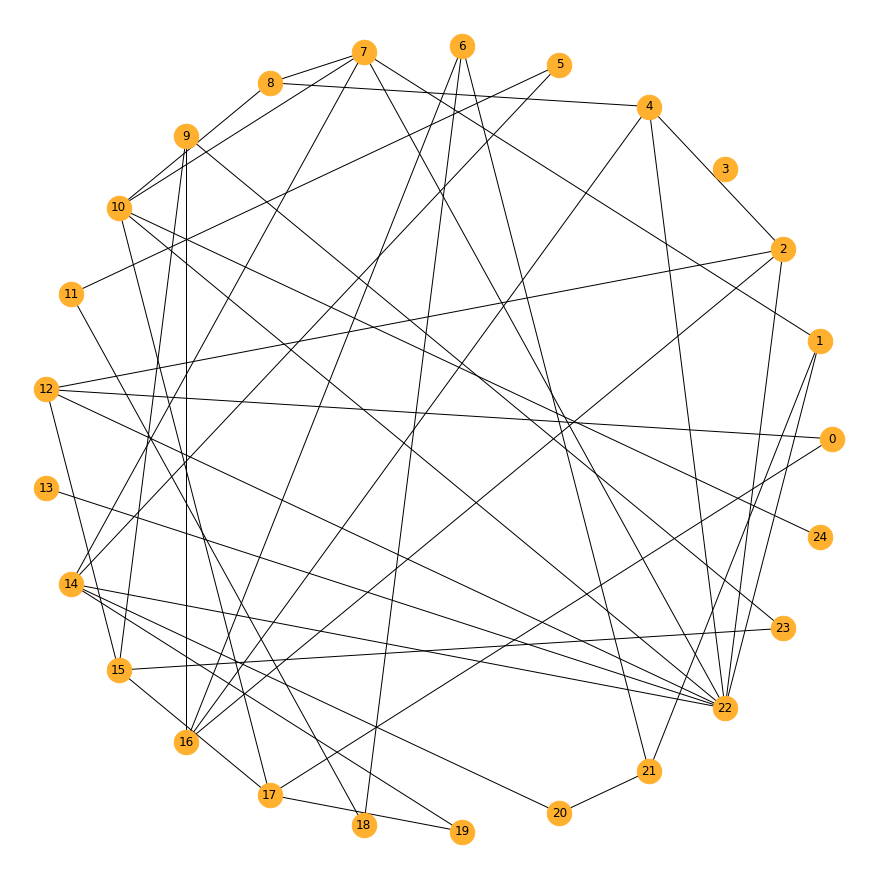

In [191]:
n= 25

graph = random_graph(n, 0.08)
nx.draw(graph,
     node_color='#ffb02e',
     node_size=600,
     with_labels=True) 
plt.figure(3,figsize=(12,12)) 
nx.draw_circular(graph,
         node_color='#ffb02e',
         node_size=600,
         with_labels=True)   
     

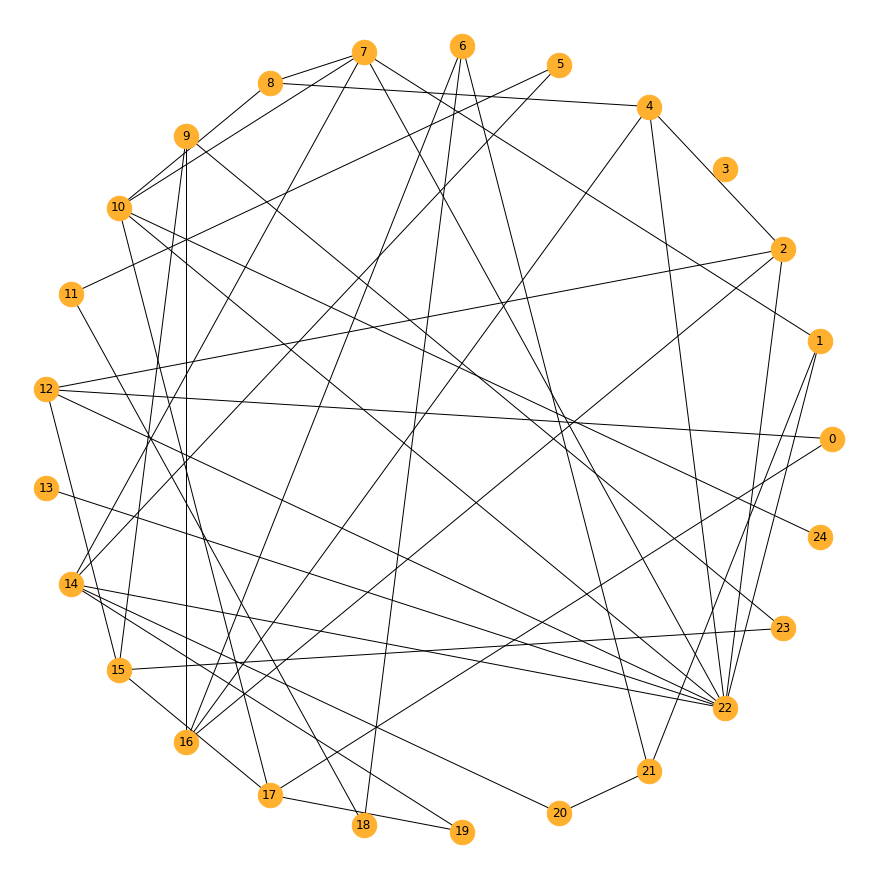

In [192]:
plt.figure(3,figsize=(12,12)) 
nx.draw_circular(graph,
         node_color='#ffb02e',
         node_size=600,
         with_labels=True)   

Найден двудольный граф
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 15, 17, 18, 19, 20, 21, 24]
Удаленные вершины: [10, 14, 16, 22, 23]


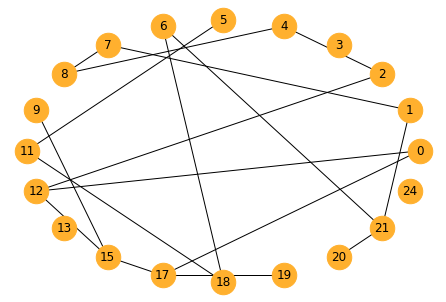

In [193]:
sub = graph
k = n-1

while not nx.is_bipartite(sub) and k > 0:
    for c in comb(n, k):
        sub = graph.subgraph(c)
        #print(list(sub))
        # print("Bipartite:", nx.is_bipartite(sub))
        if nx.is_bipartite(sub):
            print("Найден двудольный граф")
            print(list(sub))
            # print("Bipartite:", nx.is_bipartite(sub))
            dv = list(set(graph) - set(sub))
            print("Удаленные вершины:", dv)
            nx.draw_circular(sub,
                node_color="#ffb02e",
                node_size=600,
                with_labels=True) 
            break         
    k -= 1  
     

{3, 13, 24}

{0, 1, 2, 6, 8, 11, 15, 19, 20} {4, 5, 7, 9, 12, 17, 18, 21}


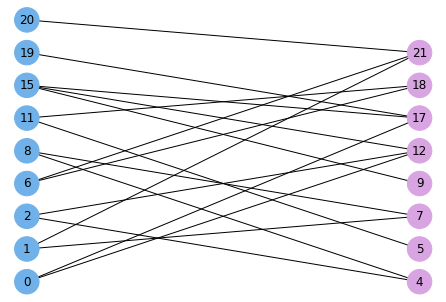

In [194]:
isolated_nodes = set(sub.nodes())
for (u, v) in sub.edges():
  isolated_nodes -= {u}
  isolated_nodes -= {v}
  
if isolated_nodes:    
    print(isolated_nodes)
    iso = isolated_nodes
else:
    print("Нет изолированных вершин")
    iso = 0

frozen_graph  = nx.freeze(sub)    
unfrozen_graph = nx.Graph(frozen_graph)

unfrozen_graph.remove_nodes_from(list(isolated_nodes)) 
print(unfrozen_graph)

X, Y = bipartite.sets(unfrozen_graph)
print(X, Y)
pos = dict()
pos.update( (n, (1, i)) for i in enumerate(X) )
pos.update( (n, (1, i)) for i, n in enumerate(X) ) # put nodes from X at x=1
pos.update( (n, (2, i)) for i, n in enumerate(Y) ) # put nodes from Y at x=2

color_map = []
for node in unfrozen_graph:
    if node in X:
        color_map.append('#6FB1E8')
    else: 
        color_map.append('#D8A4E2')   
        
nx.draw(unfrozen_graph, 
        pos=pos,
        node_color=color_map,
        node_size=600,
        with_labels=True)


In [200]:
if len(X) > len(Y): 
    maxn = len(X)
else:
    maxn = len(Y)
    
minv = len(unfrozen_graph) - maxn
print("Максимальное независимое множество = ", maxn)
print("Наименьшее вершинное покрытие = ", len(dv)+1)


Максимальное независимое множество =  9
Наименьшее вершинное покрытие =  6


In [196]:
def diplom(n):
    graph = random_graph(n, 0.2)
    k = n-1
    iter = 0
    bip = 0
    alc = 0
    
    while k > 0:
        for c in comb(n, k):
            iter += 1
            sub = graph.subgraph(c)
            if nx.is_bipartite(sub):
                bip += 1       
        k -= 1    
    print("Процент бипартизации:", bip/iter*100, "%")


In [197]:
def experiments(n):
    graph = random_graph(n, 0.4)
    k = n-1
    iter = 0
    bip = 0
    alc = 0
    
    while k > 0:
        for c in comb(n, k):
            iter += 1
            sub = graph.subgraph(c)
            if nx.is_bipartite(sub):
                bip += 1
                if not alc > 0:
                    isolated_nodes = set(sub.nodes())
                    for (u, v) in sub.edges():
                      isolated_nodes -= {u}
                      isolated_nodes -= {v}
                      
                    if isolated_nodes:    
                        iso = isolated_nodes
                    else:
                        iso = 0
                    
                    frozen_graph  = nx.freeze(sub)    
                    unfrozen_graph = nx.Graph(frozen_graph)
                    
                    unfrozen_graph.remove_nodes_from(list(isolated_nodes)) 
                    
                    X, Y = bipartite.sets(unfrozen_graph)
                    if len(X) > len(Y): 
                        maxn = len(X)
                    else:
                        maxn = len(Y)
                    
                    print(X,Y)    
                    alc = 1
                    
                    
        k -= 1    
    print("Процент бипартизации:", bip/iter*100, "%")
    print("Число Алкуина:", maxn)
    

In [198]:
i = 24   
ver = []
tm = []

while i < 24:
    print("Число вершин:", i)
    ver.append(i);
    start_time = datetime.now()
    experiments(i)
    cur_tm = datetime.now() - start_time
    print("Время работы:", cur_tm)
    tm.append(cur_tm);
    i += 4

In [199]:
i = 4

while i <= 2:
    print("Число вершин:", i)
    ver.append(i);
    start_time = datetime.now()
    experiments(i)
    cur_tm = datetime.now() - start_time
    print("Время работы:", cur_tm)
    tm.append(cur_tm);
    i += 4

